<a href="https://colab.research.google.com/github/prj99/Breast-Cancer-Prediction/blob/main/Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb

In [6]:
data=datasets.load_breast_cancer()

In [8]:
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [11]:
df=pd.DataFrame(data.data,columns=data.feature_names,)
df['target']=data.target

In [12]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [13]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [14]:
df=df.drop_duplicates()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [16]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [22]:
from sklearn.model_selection import train_test_split

In [28]:
X=data.data
Y=data.target
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=2)

#Logistic regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model=LogisticRegression()

In [29]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
pred=model.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test,pred)

0.9181286549707602

#KNeighborsClassifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier
logreg = KNeighborsClassifier(n_neighbors=6)
logreg.fit(x_train, y_train)
logreg.score(x_test, y_test)

0.9122807017543859

#Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 51)
rf_classifier.fit(x_train, y_train)
y_pred_rf = rf_classifier.predict(x_test)
accuracy_score(y_test, y_pred_rf)

0.9473684210526315

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [41]:
rf_classifier2 = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 51)
rf_classifier2.fit(x_train_sc, y_train)
y_pred_rf_sc = rf_classifier.predict(x_test_sc)
accuracy_score(y_test, y_pred_rf_sc)

0.7660818713450293

#XGBoost Classifier

In [43]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(x_train, y_train)
y_pred_xgb = xgb_classifier.predict(x_test)
accuracy_score(y_test, y_pred_xgb)

0.9590643274853801

In [44]:
xgb_classifier2 = XGBClassifier()
xgb_classifier2.fit(x_train_sc, y_train)
y_pred_xgb_sc = xgb_classifier2.predict(x_test_sc)
accuracy_score(y_test, y_pred_xgb_sc)

0.9590643274853801

#Parameter Tuning Randomized Search

In [45]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [47]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_classifier, param_distributions=params, scoring= 'roc_auc', n_jobs= -1, verbose= 3)
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [48]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.25,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [49]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [58]:
xgb_classifier_pt = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0.0,
       learning_rate=0.3, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=1, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

xgb_classifier_pt.fit(x_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=0, max_depth=3,
              max_leaves=None, min_child_weight=1, missing=1,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=1, nthread=None, num_parallel_tree=None, ...)

In [59]:
y_pred =xgb_classifier_pt.predict(x_test)

In [61]:
accuracy_score(y_test, y_pred)

0.9649122807017544

In [63]:
from sklearn.metrics import confusion_matrix

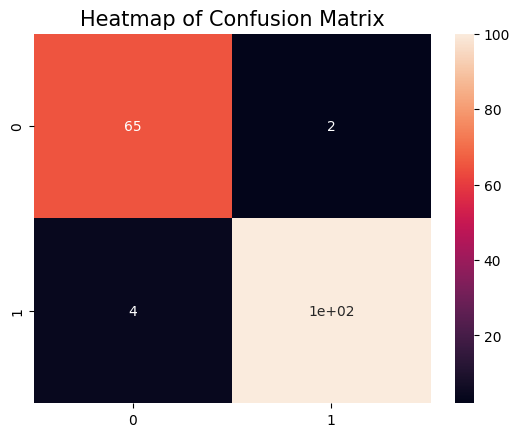

In [66]:
cm = confusion_matrix(y_test, y_pred)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sb.heatmap(cm, annot = True)
plt.show()

#Cross-validation of the ML model

In [69]:
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = xgb_classifier_pt, X = x_train_sc, y = y_train, cv = 10)
print("Cross validation of XGBoost model = ",cross_validation)
print("Cross validation of XGBoost model (in mean) = ",cross_validation.mean())
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = xgb_classifier_pt, X = x_train_sc,y = y_train, cv = 10)
print("Cross validation accuracy of XGBoost model = ", cross_validation)
print("\nCross validation mean accuracy of XGBoost model = ", cross_validation.mean())


Cross validation of XGBoost model =  [0.925      0.975      1.         1.         1.         0.95
 0.95       0.975      0.8974359  0.97435897]
Cross validation of XGBoost model (in mean) =  0.9646794871794873
Cross validation accuracy of XGBoost model =  [0.925      0.975      1.         1.         1.         0.95
 0.95       0.975      0.8974359  0.97435897]

Cross validation mean accuracy of XGBoost model =  0.9646794871794873
